In [4]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import RidgeClassifier, LogisticRegression
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

drive.mount('/content/drive')

trainData_path = '/content/drive/MyDrive/Kaggle/beats_prediction_kaggle/train.csv'
testData_path = '/content/drive/MyDrive/Kaggle/beats_prediction_kaggle/test.csv'

trainData = pd.read_csv(trainData_path)
testData= pd.read_csv(testData_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploration et traitement des données
1. Vue d'ensemble et statistiques descriptives

2. Traitement des Valeurs manquantes

3. Distribution des variables (graphiques)

4. Traitement des outliers

5. Mise à l'échelle des features


## 1. Vue d'ensemble et statistique descriptives



In [5]:
trainData.head(5)

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [6]:
testData.head(5)

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067


In [7]:
trainData.shape, testData.shape

((524164, 11), (174722, 10))

In [8]:
x_train=trainData.drop(columns=['BeatsPerMinute'])
y_train=trainData['BeatsPerMinute']
x_test=testData

In [9]:
x_test.columns, x_train.columns

(Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
        'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
        'TrackDurationMs', 'Energy'],
       dtype='object'),
 Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
        'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
        'TrackDurationMs', 'Energy'],
       dtype='object'))

In [10]:
x_test.columns==x_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [11]:
features=list(x_train.columns)
features

['id',
 'RhythmScore',
 'AudioLoudness',
 'VocalContent',
 'AcousticQuality',
 'InstrumentalScore',
 'LivePerformanceLikelihood',
 'MoodScore',
 'TrackDurationMs',
 'Energy']

In [12]:
x_train_id=x_train.pop('id')
x_test_id=x_test.pop('id')

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                524164 non-null  float64
 1   AudioLoudness              524164 non-null  float64
 2   VocalContent               524164 non-null  float64
 3   AcousticQuality            524164 non-null  float64
 4   InstrumentalScore          524164 non-null  float64
 5   LivePerformanceLikelihood  524164 non-null  float64
 6   MoodScore                  524164 non-null  float64
 7   TrackDurationMs            524164 non-null  float64
 8   Energy                     524164 non-null  float64
dtypes: float64(9)
memory usage: 36.0 MB


In [14]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                174722 non-null  float64
 1   AudioLoudness              174722 non-null  float64
 2   VocalContent               174722 non-null  float64
 3   AcousticQuality            174722 non-null  float64
 4   InstrumentalScore          174722 non-null  float64
 5   LivePerformanceLikelihood  174722 non-null  float64
 6   MoodScore                  174722 non-null  float64
 7   TrackDurationMs            174722 non-null  float64
 8   Energy                     174722 non-null  float64
dtypes: float64(9)
memory usage: 12.0 MB


##2. Traitement des valeurs manquants

In [15]:
x_test.isnull().any().any(), x_train.isnull().any().any()

(np.False_, np.False_)

###Pas de valeurs manquantes

##3. Distributions des variables

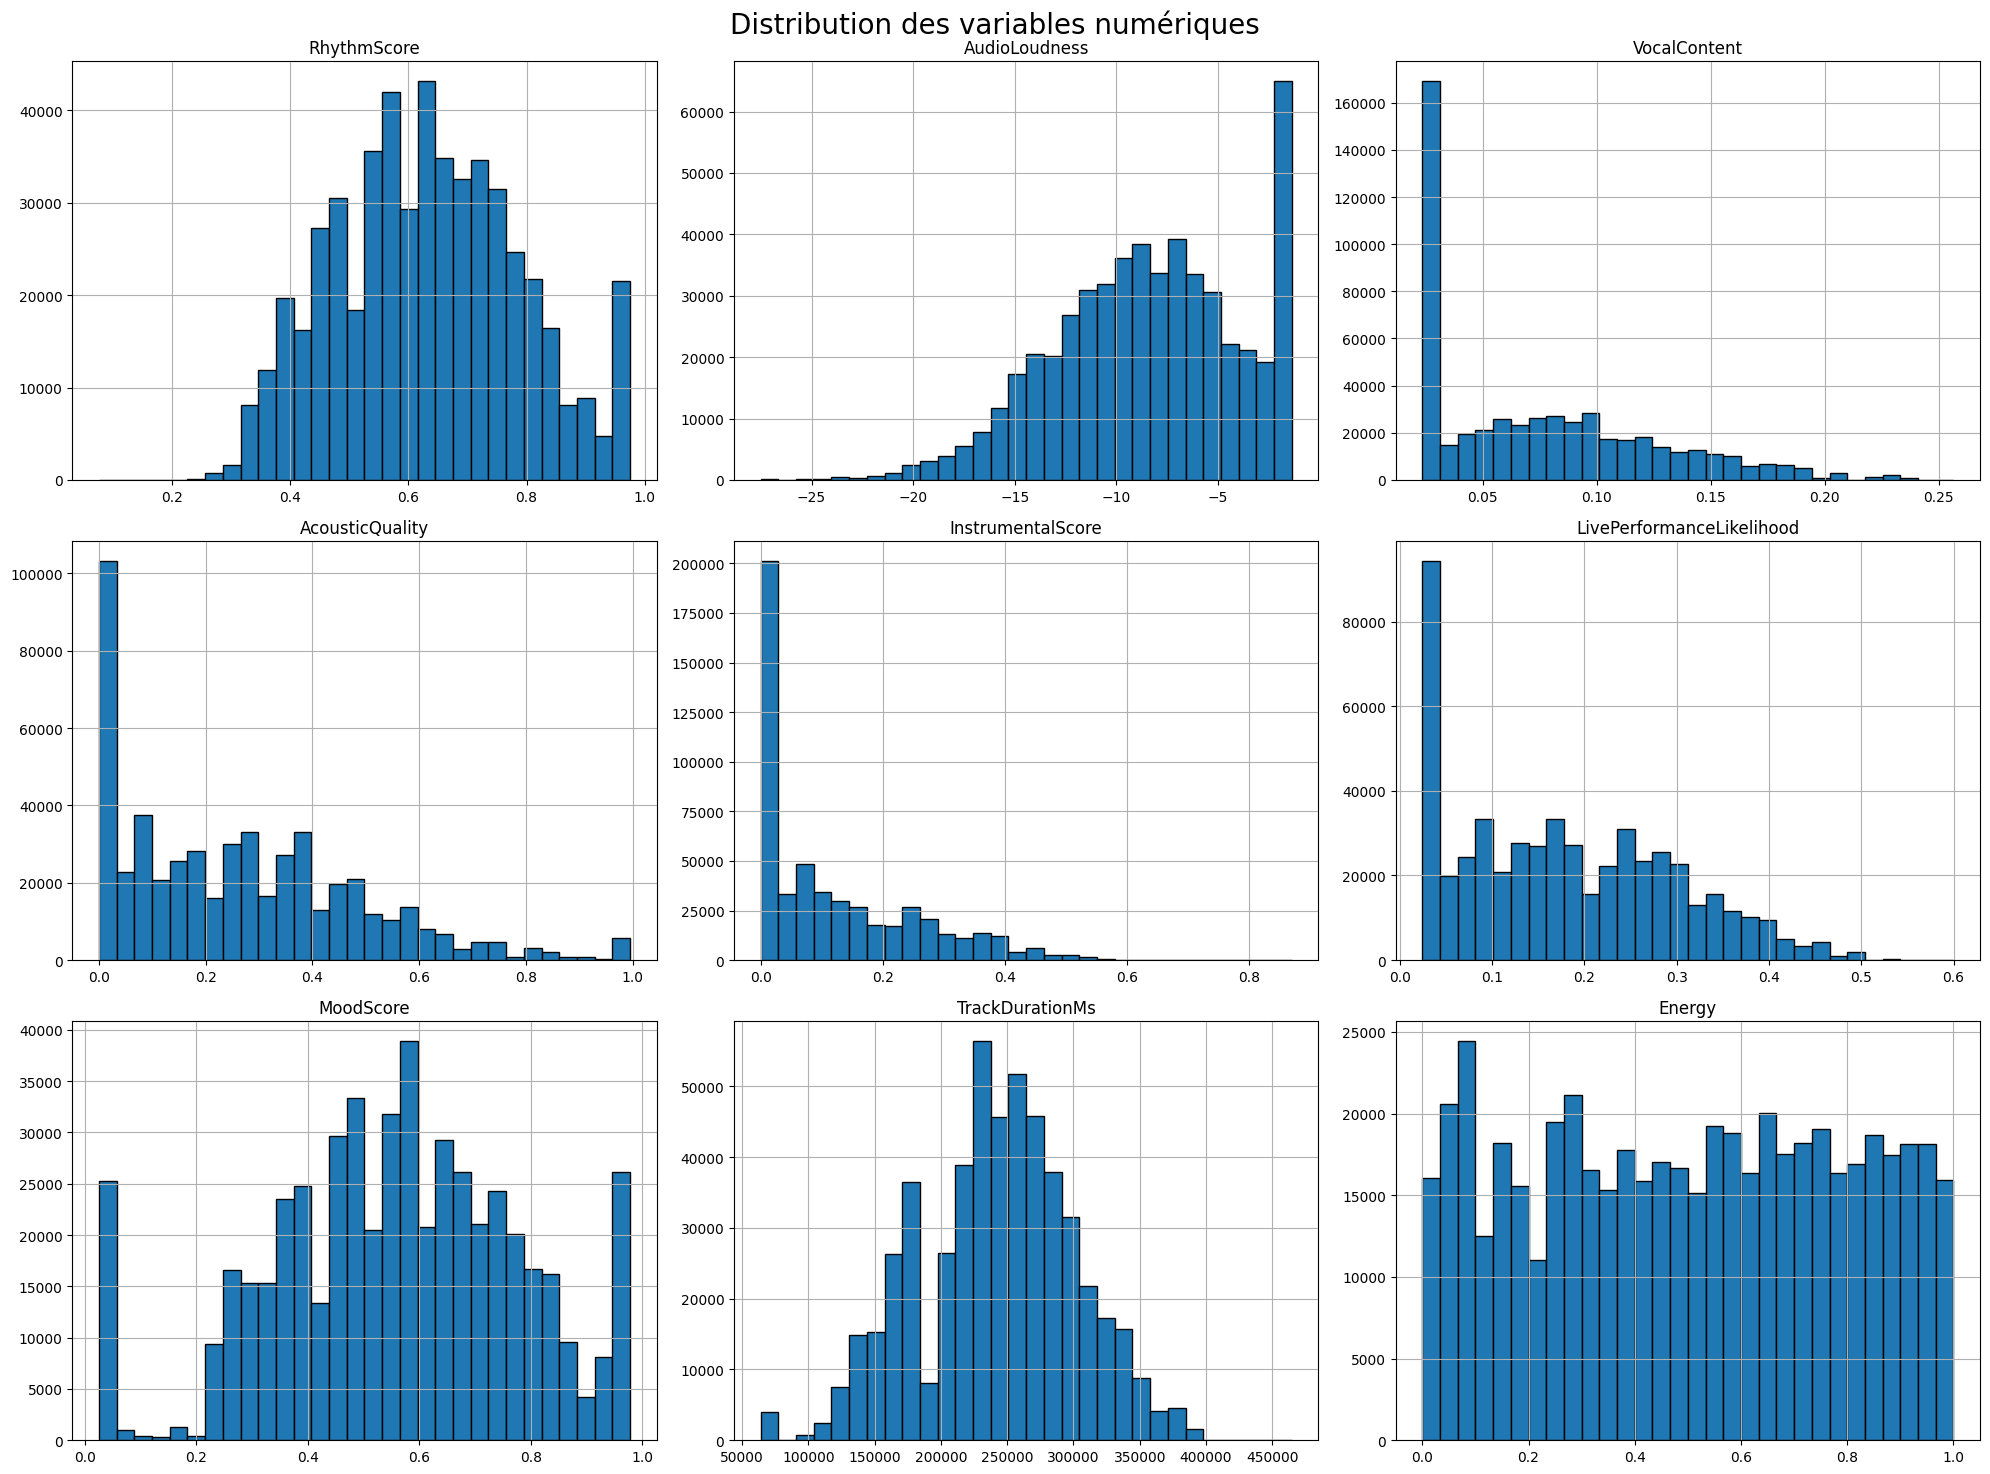

In [16]:

# Histogrammes
x_train.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=20)
plt.tight_layout()
plt.show()


## 4. Traitement des Outliers

In [17]:
import pandas as pd

# Exemple : df est ton DataFrame avec des features numériques
# Détection des outliers avec IQR
def detect_outliers_iqr(df, features):
    outliers = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # indices des valeurs aberrantes
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = outlier_indices.tolist()

    return outliers

# Exemple d’utilisation
numeric_features = x_train.select_dtypes(include=["int64", "float64"]).columns
outliers_dict = detect_outliers_iqr(x_train, numeric_features)

# Affichage
for col, idx in outliers_dict.items():
    print(f"{col}: {len(idx)} outliers détectés")


RhythmScore: 8 outliers détectés
AudioLoudness: 1770 outliers détectés
VocalContent: 1245 outliers détectés
AcousticQuality: 6746 outliers détectés
InstrumentalScore: 2845 outliers détectés
LivePerformanceLikelihood: 129 outliers détectés
MoodScore: 0 outliers détectés
TrackDurationMs: 4267 outliers détectés
Energy: 0 outliers détectés


#Feature engineering

In [18]:
import pandas as pd
import numpy as np

# Supposons que x_train et x_test sont des DataFrames pandas

def create_features(df):
    # Éviter la modification de l'original
    df = df.copy()

    # Exclure 'id' si présent
    if 'id' in df.columns:
        df = df.drop(columns=['id'])

    # Transformations simples
    df['TrackDurationMin'] = df['TrackDurationMs'] / 60000  # convertir en minutes
    df['LogTrackDuration'] = np.log1p(df['TrackDurationMs'])  # log pour réduire skew

    # Combinaisons / interactions
    df['Energy_AcousticRatio'] = df['Energy'] / (df['AcousticQuality'] + 1e-6)  # éviter div par 0
    df['Rhythm_Energy'] = df['RhythmScore'] * df['Energy']
    df['Vocal_Instrumental'] = df['VocalContent'] * df['InstrumentalScore']
    df['Live_Energy'] = df['LivePerformanceLikelihood'] * df['Energy']

    # Exemple de binning (catégorisation)
    df['MoodLevel'] = pd.cut(df['MoodScore'], bins=3, labels=['low', 'medium', 'high'])
    df = pd.get_dummies(df, columns=['MoodLevel'], drop_first=True)  # encodage one-hot

    return df

# Appliquer aux datasets
x_train_new = create_features(x_train)
x_test_new = create_features(x_test)

print(x_train_new.head())


   RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0     0.603610      -7.636942      0.023500         0.000005   
1     0.639451     -16.267598      0.071520         0.444929   
2     0.514538     -15.953575      0.110715         0.173699   
3     0.734463      -1.357000      0.052965         0.001651   
4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  TrackDurationMin  LogTrackDuration  Energy_AcousticRatio  \
0  0.826267          4.845261         12.580104         129916.1426

#5. Mise à l'échelle des features

In [19]:
from sklearn.preprocessing import RobustScaler

# Initialisation du scaler
scaler = RobustScaler()

# Fit sur les données d'entraînement uniquement
x_train_scaled_robust = scaler.fit_transform(x_train)

# Transformation des données de test
x_test_scaled_robust = scaler.transform(x_test)


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialisation du scaler
scaler_standard = StandardScaler()

# Fit sur les données d'entraînement uniquement
x_train_scaled_standard = scaler_standard.fit_transform(x_train_new)

# Transformation des données de test
x_test_scaled_standard = scaler_standard.transform(x_test_new)

#Construction d'un Modèle

##XGBoost

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    n_estimators=500,      # nombre d'arbres
    learning_rate=0.05,    # taux d'apprentissage
    max_depth=5,           # profondeur max des arbres
    subsample=0.8,         # échantillonnage pour chaque arbre
    colsample_bytree=0.8,  # sous-échantillonnage des features
    random_state=42
)

# Entraîner le modèle
xgb_model.fit(x_train_new, y_train)






KeyboardInterrupt: 

##Réseaux de neurones

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Définir le modèle
def build_nn(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')  # output pour regression
    ])

    model.compile(
        optimizer='adam',
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )
    return model

# Créer le modèle
input_dim = x_train_new.shape[1]
model = build_nn(input_dim)

# Callback pour arrêter si pas d'amélioration
early_stop = EarlyStopping(
    monitor='loss',  # ou 'val_loss' si validation split utilisé
    patience=20,
    restore_best_weights=True
)

# Entraîner le modèle
history = model.fit(
    x_train_new, y_train,
    epochs=500,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
    # validation_split=0.2  # à décommenter si tu veux un set de validation
)






Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16381/16381 - 38s - 2ms/step - loss: 172486.9688 - mean_absolute_error: 83.0781
Epoch 2/500
16381/16381 - 35s - 2ms/step - loss: 3620.6509 - mean_absolute_error: 45.0941
Epoch 3/500
16381/16381 - 36s - 2ms/step - loss: 1269.0287 - mean_absolute_error: 28.3929
Epoch 4/500
16381/16381 - 35s - 2ms/step - loss: 829.2910 - mean_absolute_error: 22.9482
Epoch 5/500
16381/16381 - 41s - 3ms/step - loss: 737.8287 - mean_absolute_error: 21.5429
Epoch 6/500
16381/16381 - 35s - 2ms/step - loss: 996.7816 - mean_absolute_error: 24.9321
Epoch 7/500
16381/16381 - 35s - 2ms/step - loss: 931.3622 - mean_absolute_error: 24.3706
Epoch 8/500
16381/16381 - 36s - 2ms/step - loss: 738.5587 - mean_absolute_error: 21.7422
Epoch 9/500
16381/16381 - 35s - 2ms/step - loss: 708.0755 - mean_absolute_error: 21.3058
Epoch 10/500
16381/16381 - 35s - 2ms/step - loss: 701.8160 - mean_absolute_error: 21.2116
Epoch 11/500
16381/16381 - 36s - 2ms/step - loss: 700.7601 - mean_absolute_error: 21.2030
Epoch 12/500
16381/16381 -

##Modèle linéaire

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled_standard, y_train)



LinearRegression()

##LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Créer le dataset LightGBM
train_data = lgb.Dataset(x_train_new, label=y_train)

# Définir les paramètres
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 42
}

# Entraîner le modèle
lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=500
)

# Prédiction sur le test
y_pred = lgb_model.predict(x_test_new)

# Afficher les 10 premières prédictions
print(y_pred[:10])


[119.53850728 119.23530666 118.98642746 119.51145115 120.38505214
 119.23850923 118.02770755 118.3516112  119.03102215 118.11020016]


##Stacking

In [ ]:
import pandas as pd
import os

df = pd.DataFrame({'id': x_test_id,'BeatsPerMinute': y_pred
})
df.to_csv("prediction.csv", index=False)
print("Fichier 'prediction.csv' créé dans le dossier courant.")




Fichier 'prediction.csv' créé dans le dossier courant.


In [ ]:
from google.colab import files
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>